In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
data = pd.read_csv("age_gender.csv")
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:
data["gender"].value_counts()

0    12391
1    11314
Name: gender, dtype: int64

In [4]:
data["ethnicity"].value_counts()

0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64

In [5]:
data["age"].sort_values

<bound method Series.sort_values of 0         1
1         1
2         1
3         1
4         1
         ..
23700    99
23701    99
23702    99
23703    99
23704    99
Name: age, Length: 23705, dtype: int64>

(array([1.605e+03, 2.890e+02, 2.730e+02, 1.960e+02, 1.310e+02, 1.390e+02,
        4.290e+02, 1.560e+02, 6.500e+01, 1.300e+02, 8.100e+01, 1.570e+02,
        4.240e+02, 1.580e+02, 2.620e+02, 9.800e+01, 2.840e+02, 3.460e+02,
        8.210e+02, 8.590e+02, 7.340e+02, 2.197e+03, 6.150e+02, 9.180e+02,
        1.294e+03, 3.500e+02, 6.640e+02, 1.430e+02, 4.090e+02, 8.800e+02,
        7.760e+02, 3.250e+02, 2.650e+02, 5.260e+02, 1.320e+02, 2.660e+02,
        1.570e+02, 5.400e+02, 1.530e+02, 1.700e+02, 1.530e+02, 1.480e+02,
        3.810e+02, 3.700e+02, 2.410e+02, 3.530e+02, 2.680e+02, 2.360e+02,
        9.700e+01, 3.530e+02, 2.930e+02, 1.590e+02, 1.250e+02, 1.030e+02,
        5.000e+01, 3.360e+02, 9.400e+01, 1.000e+02, 5.600e+01, 1.470e+02,
        3.300e+01, 1.610e+02, 3.200e+01, 1.480e+02, 5.800e+01, 2.800e+01,
        6.900e+01, 2.300e+01, 1.550e+02, 4.000e+01, 1.800e+01, 2.400e+01,
        1.550e+02, 3.500e+01, 4.400e+01, 3.300e+01, 8.200e+01, 2.000e+00,
        1.300e+01, 5.000e+00, 9.000e+0

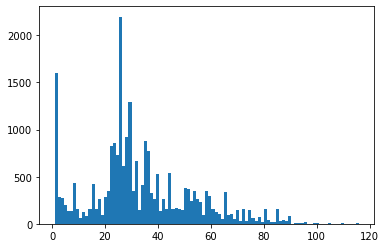

In [6]:
plt.hist(np.array(data["age"]), bins=99)

In [7]:
data = data[data['age'] <= 90]

In [8]:
x = data["pixels"]

In [9]:
y_age = np.array(data["age"])
y_gender = data["gender"]

In [10]:
y_age

array([ 1,  1,  1, ..., 90, 90, 90])

In [11]:
len(x[0].split(' '))

2304

In [12]:
np.sqrt(len(x[0].split(' ')))

48.0

In [13]:
num_pixels = 2304
img_height = 48
img_width = 48

In [14]:
x = x.apply(lambda x: x.split(' '))
x = x.apply(lambda x: np.array(list(map(lambda z: np.int(z), x))))
x = np.array(x)
x = np.stack(np.array(x), axis=0)
x = np.reshape(x, (-1, 48, 48))

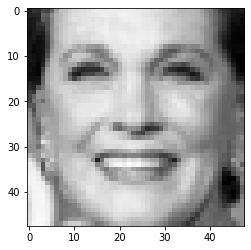

In [15]:
x_num = 19903
plt.imshow(x[x_num], cmap="gray")
plt.show()

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y_age, test_size=0.2, random_state=1)

In [17]:
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [18]:
y_test = y_test.astype(np.float32)
y_train = y_train.astype(np.float32)

print("y_test.shape: ", y_test.shape)
print("y_train.shape: ", y_train.shape)

y_test.shape:  (4724,)
y_train.shape:  (18894,)


In [19]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [20]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

In [21]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (18894, 48, 48)
x_test shape:  (4724, 48, 48)


Label:  0


<Figure size 432x288 with 0 Axes>

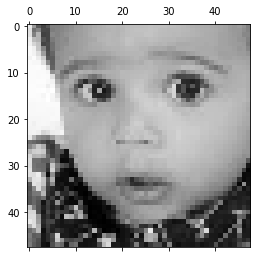

In [22]:
n = 2376
plt.gray()
plt.matshow(x_train[n])
print("Label: ", np.argmax(y_train[n]))

In [23]:
x_train.shape

(18894, 48, 48)

In [24]:
x_train = x_train.reshape(-1,48,48,1)

In [26]:
model_age = tf.keras.Sequential()
model_age.add(layers.InputLayer(input_shape=x_train.shape[1:]))
model_age.add(layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="SAME", activation="relu"))
model_age.add(layers.MaxPool2D(pool_size=2, strides=2, padding="SAME"))
model_age.add(layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="SAME", activation="relu"))
model_age.add(layers.MaxPool2D(pool_size=2, strides=2, padding="SAME"))
model_age.add(layers.Flatten())
model_age.add(layers.Dense(128))
model_age.add(layers.Dropout(0.2))
model_age.add(layers.Dense(units=1))

model_age.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [27]:
model_age.compile(
    optimizer="adam",
    loss='mean_squared_error',
    metrics=['mae']
)

In [28]:
history = model_age.fit(
    x=x_train,
    y=y_train,
    batch_size=100,
    epochs=50,
    validation_split=0.05
)

Epoch 1/50
180/180 [==============================] - 37s 204ms/step - loss: 411.9154 - mae: 15.6637 - val_loss: 312.7372 - val_mae: 13.6221
Epoch 2/50
180/180 [==============================] - 37s 204ms/step - loss: 233.4646 - mae: 11.8560 - val_loss: 241.9234 - val_mae: 12.0429
Epoch 3/50
180/180 [==============================] - 37s 208ms/step - loss: 206.3272 - mae: 11.1461 - val_loss: 228.0697 - val_mae: 11.2107
Epoch 4/50
180/180 [==============================] - 37s 207ms/step - loss: 189.4919 - mae: 10.6569 - val_loss: 204.2635 - val_mae: 10.7329
Epoch 5/50
180/180 [==============================] - 38s 213ms/step - loss: 181.2824 - mae: 10.4342 - val_loss: 194.1683 - val_mae: 10.4106
Epoch 6/50
180/180 [==============================] - 37s 207ms/step - loss: 173.7561 - mae: 10.1896 - val_loss: 187.7809 - val_mae: 10.5756
Epoch 7/50
180/180 [==============================] - 37s 208ms/step - loss: 167.1222 - mae: 10.0241 - val_loss: 192.8306 - val_mae: 10.2502
Epoch 8/50
18

In [29]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [30]:
x_test = x_test.reshape(-1,48,48,1)

In [31]:
y_pred = model_age.predict(x_test)

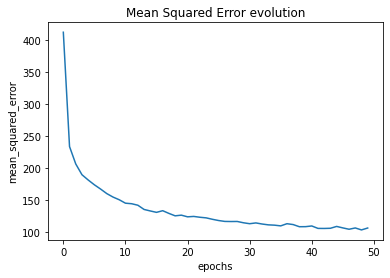

In [32]:
plt.plot(history.history['loss'])
plt.xlabel("epochs")
plt.ylabel("mean_squared_error")
plt.title("Mean Squared Error evolution")
plt.show()

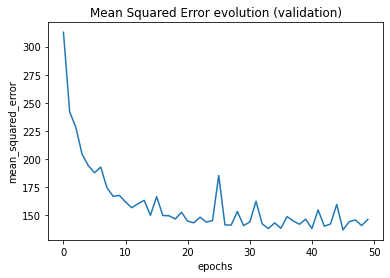

In [33]:
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("mean_squared_error")
plt.title("Mean Squared Error evolution (validation)")
plt.show()

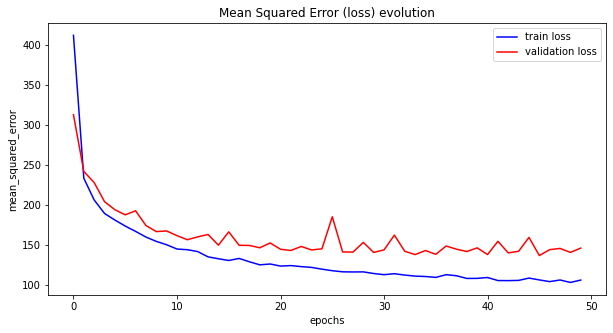

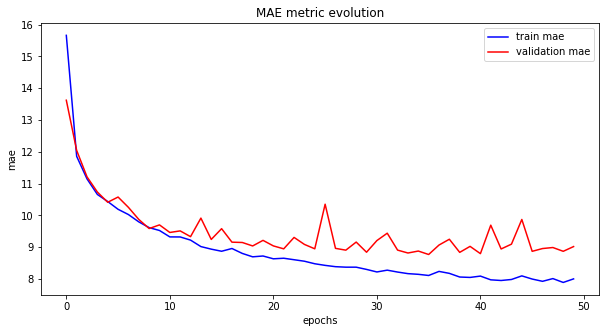

In [35]:
# wykres funkcji straty - mse
plt.figure(figsize=(10,5))
plt.title("Mean Squared Error (loss) evolution")
plt.plot(history.history["loss"], color = 'b')
plt.plot(history.history["val_loss"], color = 'r')
plt.legend(["train loss", "validation loss"])
plt.xlabel("epochs")
plt.ylabel("mean_squared_error")
plt.show()
# wyświetlamy wykresy funkcji mae
plt.figure(figsize=(10,5))
plt.title("MAE metric evolution")
plt.plot(history.history["mae"], color = 'b')
plt.plot(history.history["val_mae"], color = 'r')
plt.legend(["train mae", "validation mae"])
plt.xlabel("epochs")
plt.ylabel("mae")
plt.show()

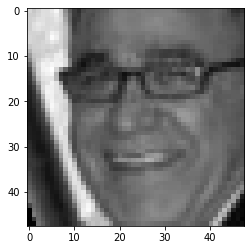

Wiek prognozowany: [[52.209045]]
Wiek referencyjny: 59.0


In [38]:
num = 145
plt.imshow(x_test[num].reshape(48,48), cmap="gray")
plt.show()
x1 = x_test[num].reshape(1,48,48,1)
y1 = model_age.predict(x1)
print(f"Wiek prognozowany: {y1}")
print(f"Wiek referencyjny: {y_test[num]}")

In [39]:
from sklearn.metrics import mean_squared_error as mse
RMSE = np.sqrt(mse(y_test, y_pred))
RMSE

11.179148

In [100]:
!mkdir -p saved_model

In [101]:
model_age.save('saved_model/model_age_all')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/model_age_all/assets
